# Medicare HHA

In [16]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

from IPython.display import display # Allows the use of display() for displaying DataFrames

import seaborn as sns

# Import supplementary visualization code visuals.py from project root folder
import visuals as vs


# Import train_test_split
from sklearn.model_selection import train_test_split

# Pretty display for notebooks
%matplotlib inline

In [17]:
# Import data
hha_file = "./datasets/Medicare_Home_Health_Agency Data 2013-2016 - clean1.csv"
hha_df = pd.read_csv(hha_file)
hha_df.head()

,Year,Provider ID,Agency Name,Street Address,City,State,Zip Code,Total Episodes (non-LUPA),Distinct Beneficiaries (non-LUPA),Average Number of Total Visits Per Episode (non-LUPA),...,Percent of Beneficiaries with Chronic Kidney Disease,Percent of Beneficiaries with COPD,Percent of Beneficiaries with Depression,Percent of Beneficiaries with Diabetes,Percent of Beneficiaries with Hyperlipidemia,Percent of Beneficiaries with IHD,Percent of Beneficiaries with Osteoporosis,Percent of Beneficiaries with RA/OA,Percent of Beneficiaries with Schizophrenia,Percent of Beneficiaries with Stroke
0,2016,17008,JEFFERSON COUNTY HOME CARE,2201 ARLINGTON AVENUE,BESSEMER,AL,35020,133,54.0,11.6,...,0.4444,0.1667,0.1852,0.5741,0.4444,0.2963,0.0000,0.4815,0.2778,0.0741
1,2016,17009,ALACARE HOME HEALTH & HOSPICE,2970 LORNA ROAD,BIRMINGHAM,AL,35216,12879,6616.0,18.9,...,0.5494,0.3832,0.3939,0.4512,0.6743,0.5644,0.1329,0.6463,0.0523,0.1276
2,2016,17013,GENTIVA HEALTH SERVICES,1239 RUCKER BLVD,ENTERPRISE,AL,36330,1236,612.0,23.4,...,0.4641,0.3252,0.3824,0.4526,0.6618,0.5114,0.1650,0.6716,0.0523,0.1275
3,2016,17014,AMEDISYS HOME HEALTH,68278 MAIN STREET,BLOUNTSVILLE,AL,35031,685,403.0,21.4,...,0.5236,0.3648,0.4690,0.4442,0.6079,0.5459,0.1290,0.6725,0.0869,0.1737
4,2016,17016,SOUTHEAST ALABAMA HOMECARE,804 GLOVER AVENUE,ENTERPRISE,AL,36330,685,362.0,15.5,...,0.5414,0.4033,0.3591,0.5249,0.6934,0.5829,0.1492,0.6077,0.0525,0.1519


In [3]:
# convert to numeric
hha_df[['Zip Code', 'Total Episodes (non-LUPA)', 'Distinct Beneficiaries (non-LUPA)', 'Average Number of Total Visits Per Episode (non-LUPA)',\
        'Average Number of Skilled Nursing Visits Per Episode (non-LUPA)', 'Average Number of PT Visits Per Episode (non-LUPA)',\
        'Average Number of OT Visits Per Episode (non-LUPA)', 'Average Number of  ST Visits Per Episode (non-LUPA)',\
        'Average Number of Home Health Aide Visits Per Episode (non-LUPA)', 'Average Number of Medical-Social Visits Per Episode (non-LUPA)',\
        'Total HHA Charge Amount (non-LUPA)', 'Total HHA Medicare Payment Amount (non-LUPA)',\
        'Total HHA Medicare Standard Payment Amount (non-LUPA)', 'Outlier Payments as a Percent of Medicare Payment Amount (non-LUPA)',\
        'Average Age', 'Male Beneficiaries', 'Female Beneficiaries', 'White Beneficiaries', 'Black Beneficiaries', 'Asian Pacific Islander Beneficiaries',\
        'Hispanic Beneficiaries', 'American Indian or Alaska Native Beneficiaries', 'Average HCC Score', ' Percent of Beneficiaries with Atrial Fibrillation ',\
        " Percent of Beneficiaries with Alzheimer's ", ' Percent of Beneficiaries with Asthma ', ' Percent of Beneficiaries with Cancer ',\
        ' Percent of Beneficiaries with CHF ', ' Percent of Beneficiaries with Chronic Kidney Disease ', ' Percent of Beneficiaries with COPD ',\
        ' Percent of Beneficiaries with Depression ', ' Percent of Beneficiaries with Diabetes ', ' Percent of Beneficiaries with Hyperlipidemia ',\
        ' Percent of Beneficiaries with IHD ', ' Percent of Beneficiaries with Osteoporosis ', ' Percent of Beneficiaries with RA/OA ',\
        ' Percent of Beneficiaries with Schizophrenia ', ' Percent of Beneficiaries with Stroke ']] = hha_df[['Zip Code', 'Total Episodes (non-LUPA)', 'Distinct Beneficiaries (non-LUPA)', 'Average Number of Total Visits Per Episode (non-LUPA)',\
        'Average Number of Skilled Nursing Visits Per Episode (non-LUPA)', 'Average Number of PT Visits Per Episode (non-LUPA)',\
        'Average Number of OT Visits Per Episode (non-LUPA)', 'Average Number of  ST Visits Per Episode (non-LUPA)',\
        'Average Number of Home Health Aide Visits Per Episode (non-LUPA)', 'Average Number of Medical-Social Visits Per Episode (non-LUPA)',\
        'Total HHA Charge Amount (non-LUPA)', 'Total HHA Medicare Payment Amount (non-LUPA)',\
        'Total HHA Medicare Standard Payment Amount (non-LUPA)', 'Outlier Payments as a Percent of Medicare Payment Amount (non-LUPA)',\
        'Average Age', 'Male Beneficiaries', 'Female Beneficiaries', 'White Beneficiaries', 'Black Beneficiaries', 'Asian Pacific Islander Beneficiaries',\
        'Hispanic Beneficiaries', 'American Indian or Alaska Native Beneficiaries', 'Average HCC Score', ' Percent of Beneficiaries with Atrial Fibrillation ',\
        " Percent of Beneficiaries with Alzheimer's ", ' Percent of Beneficiaries with Asthma ', ' Percent of Beneficiaries with Cancer ',\
        ' Percent of Beneficiaries with CHF ', ' Percent of Beneficiaries with Chronic Kidney Disease ', ' Percent of Beneficiaries with COPD ',\
        ' Percent of Beneficiaries with Depression ', ' Percent of Beneficiaries with Diabetes ', ' Percent of Beneficiaries with Hyperlipidemia ',\
        ' Percent of Beneficiaries with IHD ', ' Percent of Beneficiaries with Osteoporosis ', ' Percent of Beneficiaries with RA/OA ',\
        ' Percent of Beneficiaries with Schizophrenia ', ' Percent of Beneficiaries with Stroke ']].apply(pd.to_numeric)

In [4]:
# Get column names
hha_columns = list(hha_df)
hha_columns

# Get info about Avg HCC Score
# hhc_describe = hha_df["Average HCC Score"].describe()
# hhc_describe

['Year',
 'Provider ID',
 'Agency Name',
 'Street Address',
 'City',
 'State',
 'Zip Code',
 'Total Episodes (non-LUPA)',
 'Distinct Beneficiaries (non-LUPA)',
 'Average Number of Total Visits Per Episode (non-LUPA)',
 'Average Number of Skilled Nursing Visits Per Episode (non-LUPA)',
 'Average Number of PT Visits Per Episode (non-LUPA)',
 'Average Number of OT Visits Per Episode (non-LUPA)',
 'Average Number of  ST Visits Per Episode (non-LUPA)',
 'Average Number of Home Health Aide Visits Per Episode (non-LUPA)',
 'Average Number of Medical-Social Visits Per Episode (non-LUPA)',
 'Total HHA Charge Amount (non-LUPA)',
 'Total HHA Medicare Payment Amount (non-LUPA)',
 'Total HHA Medicare Standard Payment Amount (non-LUPA)',
 'Outlier Payments as a Percent of Medicare Payment Amount (non-LUPA)',
 'Average Age',
 'Male Beneficiaries',
 'Female Beneficiaries',
 'White Beneficiaries',
 'Black Beneficiaries',
 'Asian Pacific Islander Beneficiaries',
 'Hispanic Beneficiaries',
 'American Ind

In [5]:
# remove NaN rows
clean_hha_df = hha_df.dropna()
clean_hha_df.head()

# Get info about cleaned Avg HCC Score
clean_hhc_describe = clean_hha_df["Average HCC Score"].describe()
clean_hhc_describe

count    41426.000000
mean         2.239082
std          0.453816
min          0.740000
25%          1.950000
50%          2.190000
75%          2.460000
max          8.200000
Name: Average HCC Score, dtype: float64

In [6]:
# Cleaner - replace astericks with 0

cleaner_hha_df = clean_hha_df.replace('^\*+$', 0, regex=True)
cleaner_hha_df = clean_hha_df.replace(' * ', 0, regex=True)
# cleaner_hha_df = clean_hha_df.replace('*', 0, regex=True)
cleaner_hha_df.head()
cleaner_hha_df.describe()

,Year,Provider ID,Street Address,Zip Code,Total Episodes (non-LUPA),Distinct Beneficiaries (non-LUPA),Average Number of Total Visits Per Episode (non-LUPA),Average Number of Skilled Nursing Visits Per Episode (non-LUPA),Average Number of PT Visits Per Episode (non-LUPA),Average Number of OT Visits Per Episode (non-LUPA),...,Percent of Beneficiaries with Chronic Kidney Disease,Percent of Beneficiaries with COPD,Percent of Beneficiaries with Depression,Percent of Beneficiaries with Diabetes,Percent of Beneficiaries with Hyperlipidemia,Percent of Beneficiaries with IHD,Percent of Beneficiaries with Osteoporosis,Percent of Beneficiaries with RA/OA,Percent of Beneficiaries with Schizophrenia,Percent of Beneficiaries with Stroke
count,41426.000000,41426.000000,41426.0,41426.000000,41426.000000,41426.000000,41426.000000,41426.000000,41426.000000,41426.000000,...,41426.000000,41426.000000,41426.000000,41426.000000,41426.000000,41426.000000,41426.000000,41426.000000,41426.000000,41426.000000
mean,2014.421692,315134.714696,0.0,58262.366606,577.580843,336.865543,18.581265,9.467383,5.184671,1.100847,...,0.451334,0.325233,0.393359,0.476701,0.539122,0.514636,0.153294,0.457658,0.096638,0.117573
std,1.100485,223449.473739,0.0,25091.483753,1014.913105,657.423901,6.602347,4.737287,2.845963,1.150557,...,0.105333,0.096281,0.114249,0.132117,0.219318,0.166949,0.070080,0.255548,0.071426,0.047346
min,2013.000000,17008.000000,0.0,601.000000,11.000000,11.000000,5.100000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,109653.000000,0.0,35121.000000,134.000000,67.000000,14.900000,7.300000,3.300000,0.200000,...,0.390000,0.260000,0.328325,0.409100,0.520000,0.470000,0.110000,0.410000,0.055600,0.090000
50%,2014.000000,247226.000000,0.0,60645.000000,297.000000,152.000000,17.400000,8.700000,4.900000,0.800000,...,0.460000,0.320000,0.390000,0.474400,0.614000,0.550000,0.150000,0.560000,0.080000,0.120000
75%,2015.000000,457996.000000,0.0,77511.000000,628.000000,353.000000,20.400000,10.400000,6.700000,1.700000,...,0.520000,0.380000,0.460000,0.560000,0.673100,0.620000,0.190000,0.630800,0.120000,0.140000
max,2016.000000,747978.000000,0.0,99901.000000,53408.000000,35500.000000,116.800000,111.200000,25.500000,12.400000,...,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.730000,0.750000,0.750000,0.530000


## Data prep, transforming, splitting

In [7]:
#Defining the splits for HCC scores. 0-1.08 will be low risk, 1.09+ will be high risk.
bins = [0, 1.09, 10]

#1 for low risk, 2 for high risk
risk_labels=[1, 2]

cleaner_hha_df['risk_categorical'] = pd.cut(cleaner_hha_df['Average HCC Score'], bins=bins, labels=risk_labels, include_lowest=True)

# Split the data into features and target label
risk_raw = cleaner_hha_df['risk_categorical']
features_raw = cleaner_hha_df.drop(['Average HCC Score', 'risk_categorical', 'Provider ID', 'Agency Name', 'Street Address',\
                                    'City', 'State',], axis = 1)

cleaner_hha_df.head()
cleaner_hha_df.to_csv("./datasets/cleaner_hha_df.csv")

## Training & Testing

In [8]:
# Split the 'features' and 'risk' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_raw, risk_raw, test_size = 0.2, random_state = 42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 33140 samples.
Testing set has 8286 samples.


In [9]:
# Import two classification metrics from sklearn - fbeta score and accuracy score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict_evaluate(learner, sample_size, X_train, y_train, X_test, y_test):
    '''
    inputs:
    - learner: the learning algorithm to be trained/predicted on
    - sample_size: the size of samples to be drawn from the training set
    - X_train: features training set
    - y_train: risk training set
    - x_test: features test set
    - y_test: risk test set
    '''
    
    results = {}
    
    """
    Fit/train the learner to the training data using slicing with sample_size
    using .fit(training_features[:], training_labels[:])
    """
    
    start = time()
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time()
    
#     Calculate training time
    results["train_time"] = end - start
    
    """
    Get predictions on the first 300 training samples (X_train)
    and predictions on the test set (X_test) using .predict()
    """
    
    start = time()
    predictions_train = learner.predict(X_train[:300])
    predictions_test = learner.predict(X_test)
    end = time()
    
    # Calculate the total prediction time
    results["pred_time"] = end - start
    
    # Compute accuracy on the first 300 training samples, which is y_train[:300]
    results["acc_train"] = accuracy_score(y_train[:300], predictions_train)
    
    # Compute accuracy on test set, using accuracy_score()
    results["acc_test"] = accuracy_score(y_test, predictions_test)
    
    # Compute f1-score on the first 300 training samples, using fbeta_score()
    results["f_train"] = fbeta_score(y_train[:300], predictions_train, beta=0.5, average="micro")
    
    # Compute f1-score on test set, which is y_test
    results["f_test"] = fbeta_score(y_test, predictions_test, beta=0.5, average="micro")
    
    # Success
    print("{} trained on {} samples".format(learner.__class__.__name__, sample_size))
    
    # Return results
    return results

## Model Validation

GaussianNB trained on 331 samples
GaussianNB trained on 3314 samples
GaussianNB trained on 33140 samples
DecisionTreeClassifier trained on 331 samples
DecisionTreeClassifier trained on 3314 samples
DecisionTreeClassifier trained on 33140 samples
RandomForestClassifier trained on 331 samples
RandomForestClassifier trained on 3314 samples
RandomForestClassifier trained on 33140 samples


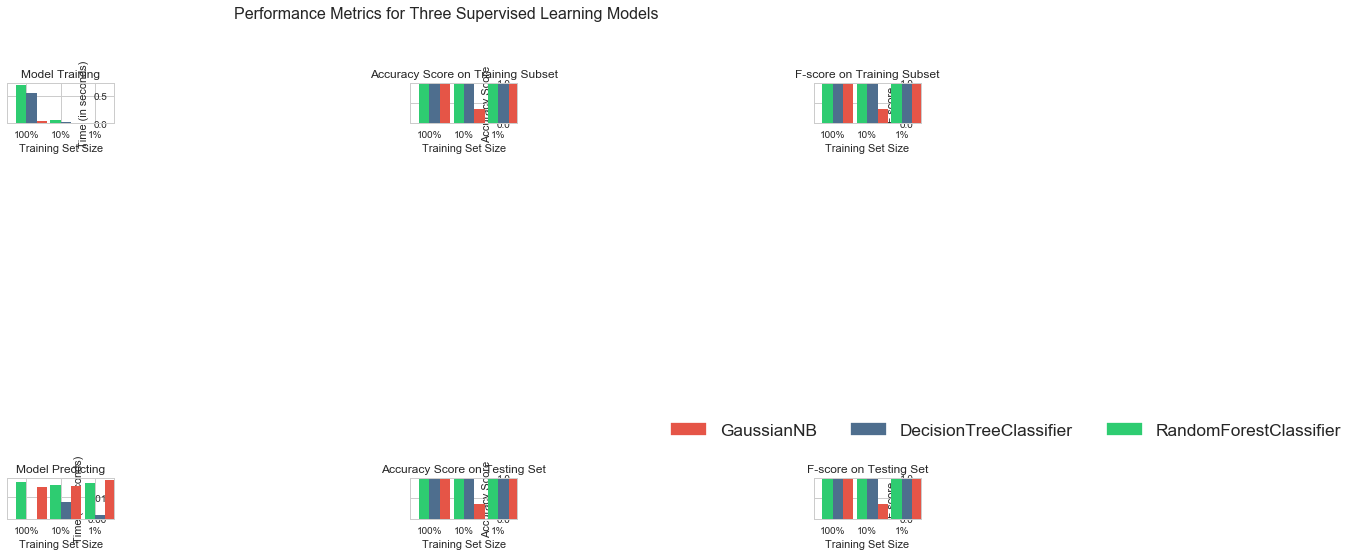

{'GaussianNB': {0: {'train_time': 0.0049626827239990234, 'pred_time': 0.018068313598632812, 'acc_train': 1.0, 'acc_test': 0.9990345160511707, 'f_train': 1.0, 'f_test': 0.9990345160511706}, 1: {'train_time': 0.0024709701538085938, 'pred_time': 0.015511751174926758, 'acc_train': 0.35333333333333333, 'acc_test': 0.3750905141202028, 'f_train': 0.35333333333333333, 'f_test': 0.3750905141202028}, 2: {'train_time': 0.05076098442077637, 'pred_time': 0.01473689079284668, 'acc_train': 0.9966666666666667, 'acc_test': 0.9990345160511707, 'f_train': 0.9966666666666667, 'f_test': 0.9990345160511706}}, 'DecisionTreeClassifier': {0: {'train_time': 0.0034754276275634766, 'pred_time': 0.0018658638000488281, 'acc_train': 1.0, 'acc_test': 0.9958966932174752, 'f_train': 1.0, 'f_test': 0.9958966932174751}, 1: {'train_time': 0.0346987247467041, 'pred_time': 0.007957935333251953, 'acc_train': 1.0, 'acc_test': 0.9968621771663047, 'f_train': 1.0, 'f_test': 0.9968621771663045}, 2: {'train_time': 0.55156803131103

In [13]:
# Import any three supervised learning classification models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression

# Initialize the three models
clf_A = GaussianNB()
clf_B = DecisionTreeClassifier(max_depth=None, random_state=None)
clf_C = RandomForestClassifier(max_depth=None, random_state=None)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
samples_100 = len(y_train)
samples_10 = int(len(y_train)*10/100)
samples_1 = int(len(y_train)*1/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict_evaluate(clf, samples, X_train, y_train, X_test, y_test)

    #print(results)

# Run metrics visualization for the three supervised learning models chosen
vs.visualize_classification_performance(results)

print(results)

Index(['Year', 'Zip Code', 'Total Episodes (non-LUPA)',
       'Distinct Beneficiaries (non-LUPA)',
       'Average Number of Total Visits Per Episode (non-LUPA)',
       'Average Number of Skilled Nursing Visits Per Episode (non-LUPA)',
       'Average Number of PT Visits Per Episode (non-LUPA)',
       'Average Number of OT Visits Per Episode (non-LUPA)',
       'Average Number of  ST Visits Per Episode (non-LUPA)',
       'Average Number of Home Health Aide Visits Per Episode (non-LUPA)',
       'Average Number of Medical-Social Visits Per Episode (non-LUPA)',
       'Total HHA Charge Amount (non-LUPA)',
       'Total HHA Medicare Payment Amount (non-LUPA)',
       'Total HHA Medicare Standard Payment Amount (non-LUPA)',
       'Outlier Payments as a Percent of Medicare Payment Amount (non-LUPA)',
       'Average Age', 'Male Beneficiaries', 'Female Beneficiaries',
       'White Beneficiaries', 'Black Beneficiaries',
       'Asian Pacific Islander Beneficiaries', 'Hispanic Beneficiar

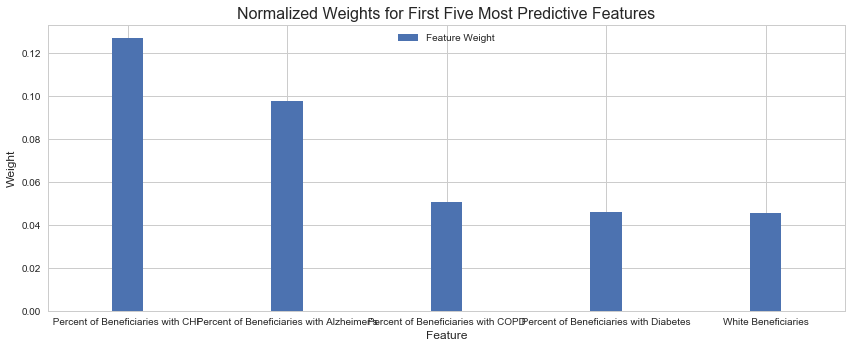

In [14]:
# Import a supervised learning model that has 'feature_importances_'
model = RandomForestClassifier(max_depth=None, random_state=None)

# Train the supervised model on the training set using .fit(X_train, y_train)
model = model.fit(X_train, y_train)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_
print(X_train.columns)
print(importances)

# Plot
vs.feature_plot(importances, X_train, y_train)

## Hyperparameter Tuning

In [15]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = RandomForestClassifier(max_depth=None, random_state=None)

# Create the parameters or base_estimators list you wish to tune, using a dictionary if needed.
# Example: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}

"""
n_estimators: Number of trees in the forest
max_features: The number of features to consider when looking for the best split
max_depth: The maximum depth of the tree
"""
parameters = {'n_estimators': [10, 20, 30], 'max_features':[3,4,5, None], 'max_depth': [5,6,7, None]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5, average="micro")

# TODO: Perform grid search on the claszsifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5, average="micro")))
print("\nOptimized Model\n------")
print(best_clf)
print("\nFinal accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5,  average="micro")))

Unoptimized model
------
Accuracy score on testing data: 0.9990
F-score on testing data: 0.9990

Optimized Model
------
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Final accuracy score on the testing data: 0.9992
Final F-score on the testing data: 0.9992
